In [12]:
#importing the libraries
%pylab inline
from scipy.integrate import odeint
import imageio 
import os
import networkx as nx 


Populating the interactive namespace from numpy and matplotlib


# Question 1

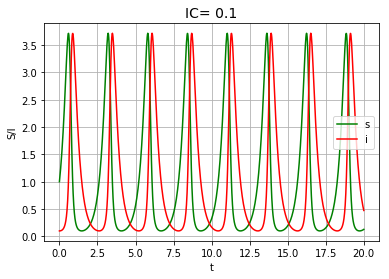

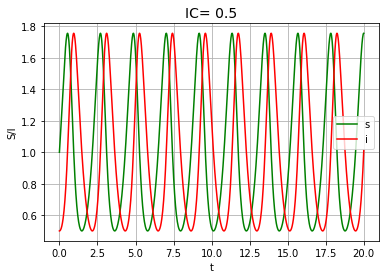

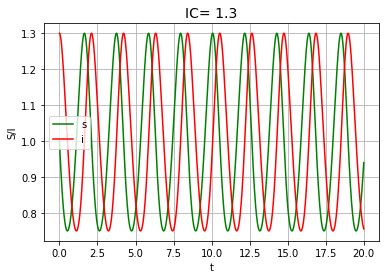

In [2]:
def SI_Model(ic, t):
    """This function takes the  initial conditions and time and returns the two ODE Equations
    ----------------------------------------------------------------------------------------
    Parameters:
    
    ic: Initial conditions which the Suseptible and Infected is indexed with
    t= the time points
    
    The function returns two ode results "dsdt,didt"
    
    """
    # initializing the s_t- susceptible and i_t infected individuals
    s_t = ic[0]
    i_t = ic[1]
    #The values of the constant used in the model
    b = 3
    beta = 3
    k = 3
    #ODE Equations for the plague model
    dsdt = (b*s_t) - (beta*i_t*s_t)
    didt = (beta*i_t*s_t) - (k*i_t)
    return [dsdt, didt]
# plotting the SI models with initial conditions  
for c in [0.1,0.5,1.3]: #initial conditions
    icc = [1, c]
    t = np.linspace(0,20,1000)
    result = odeint(SI_Model, icc, t)
    s_t = result[:,0]
    i_t = result[:,1]
    #plotting the model
    plt.plot(t,s_t,'g')
    plt.plot(t,i_t,'r')
    plt.ylabel('S/I')
    plt.xlabel('t')
    plt.title('IC=' + ' ' + str(c), fontsize='14', fontname="sans")
    plt.grid()
    plt.legend('si')
    plt.show()




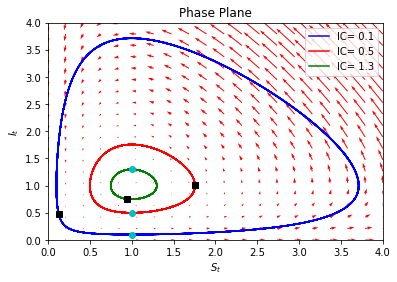

In [3]:
#Ploting the Phase diagram
#defining the interval for the susecptible and infected
st = linspace(0.0, 4.0, 20)
it = linspace(0.0, 4.0, 20)
#make  an arrays for the  S and I arrays
St, It = meshgrid(st, it)
#make an array 
u, v = zeros(St.shape), zeros(It.shape)
m1, m2 = St.shape
for i in range(m1):
    for j in range(m2):
        x = St[i, j]
        y = It[i, j]
        res_t = SI_Model([x, y], 0)
        u[i,j] = res_t[0]
        v[i,j] = res_t[1]
#plotting the phase diagram
plt.quiver(St, It, u, v, color='r')
plt.xlabel('$S_{t}$')
plt.ylabel('$I_{t}$')
plt.xlim([0, 4])
plt.ylim([0, 4])

#plotting the phase diagram with  different initial condition
for cm in [0.1, 0.5, 1.3]:    
    ic = [1, cm]
    t = linspace(0,20,1000)
    result = odeint(SI_Model, ic, t)
    if cm==0.1:
        color='b'
    elif cm == 0.5:
        color = 'r'
    else:
        color = 'g'
    plt.plot(result[:,0], result[:,1], color=color,label='IC=' + ' ' + str(cm)) # path
    plt.plot([result[0,0]], [result[0,1]],'o',color='c') # start
    plt.plot([result[-1,0]], [result[-1,1]],'s',color='k') # end
    

plt.xlim([0, 4])
plt.title("Phase Plane")
#plt.legend()
plt.legend(loc='best')
plt.show()


# Question 2A

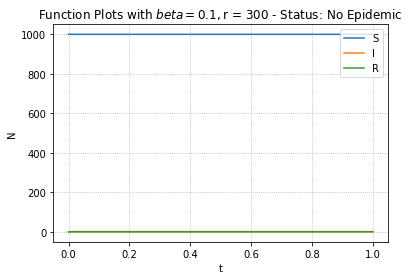

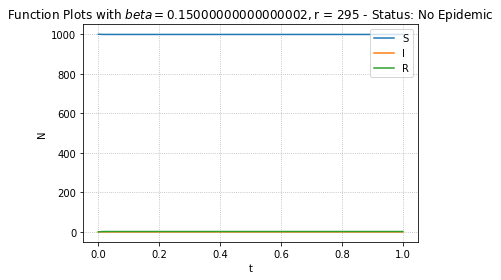

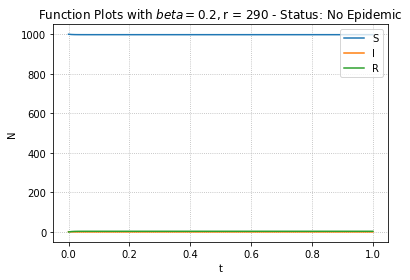

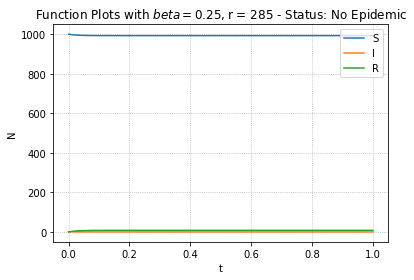

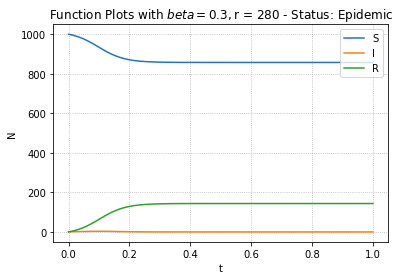

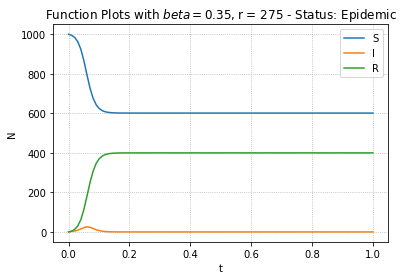

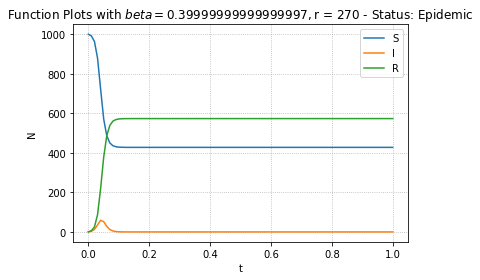

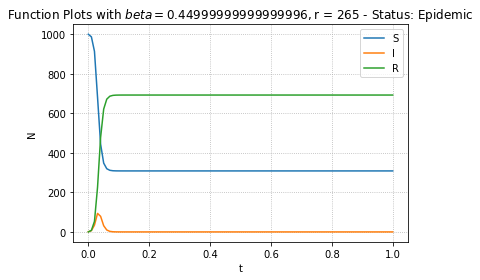

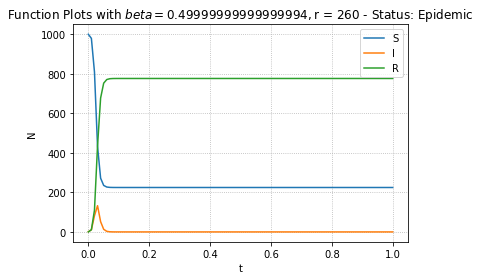

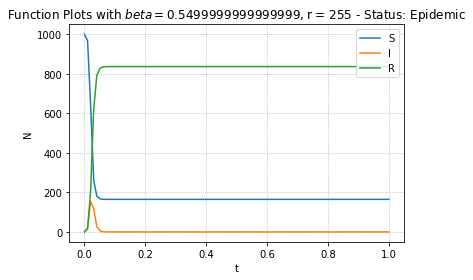

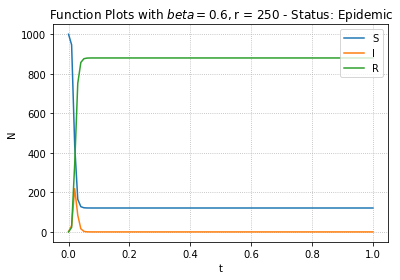

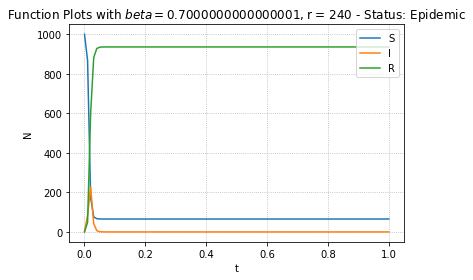

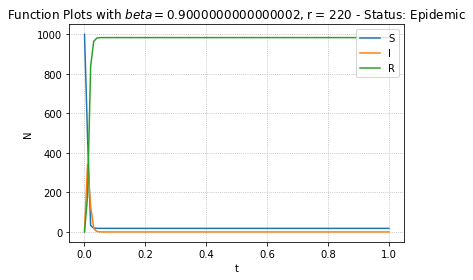

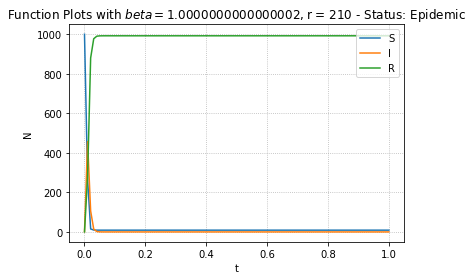

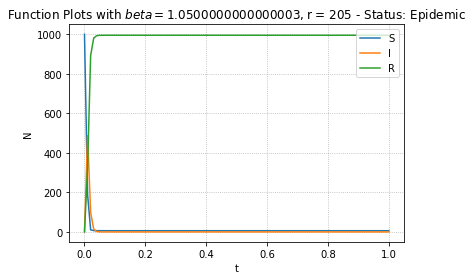

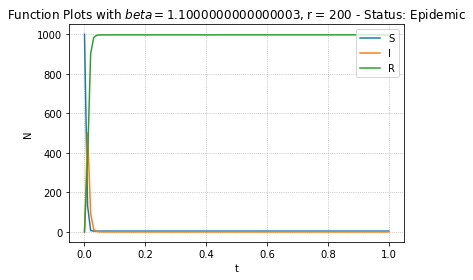

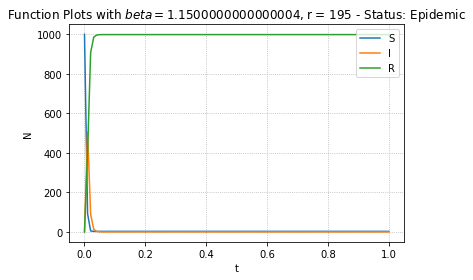

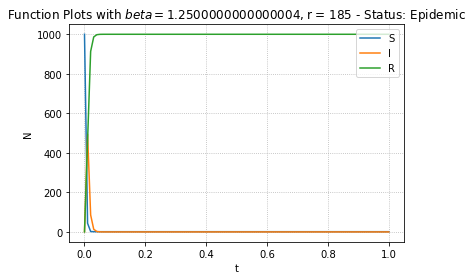

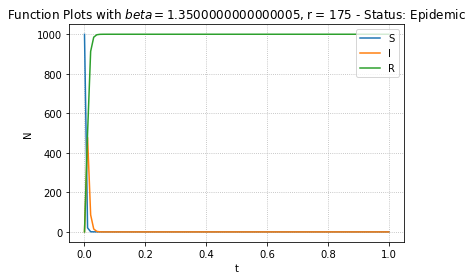

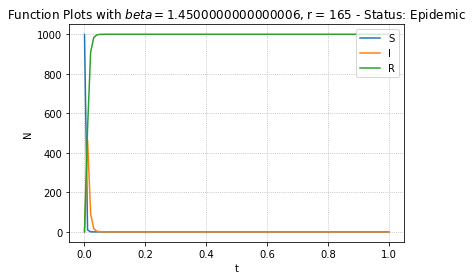

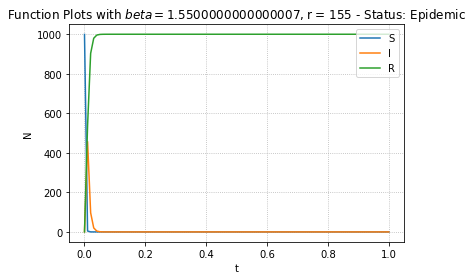

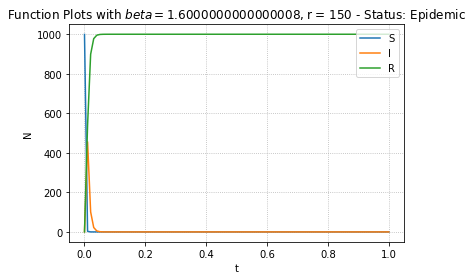

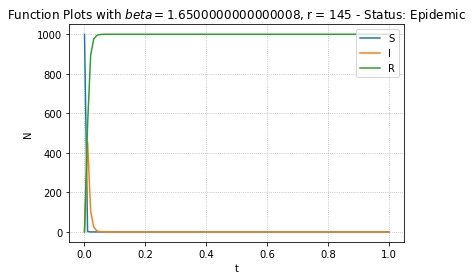

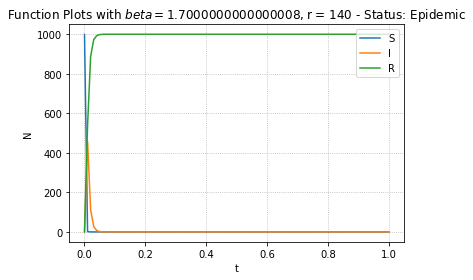

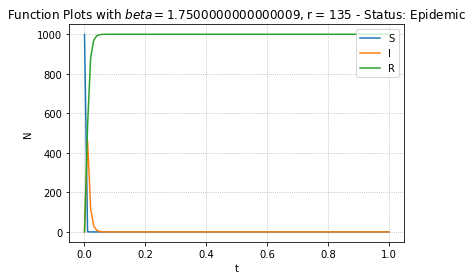

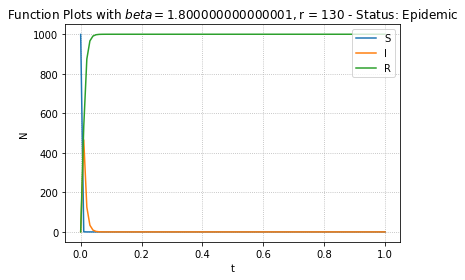

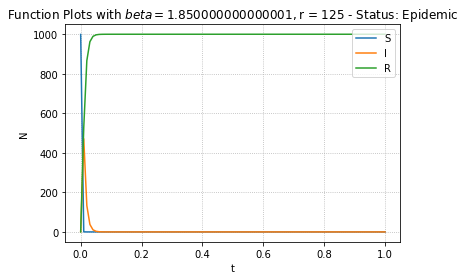

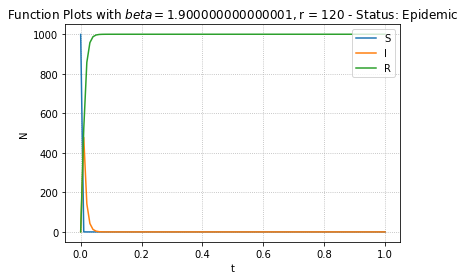

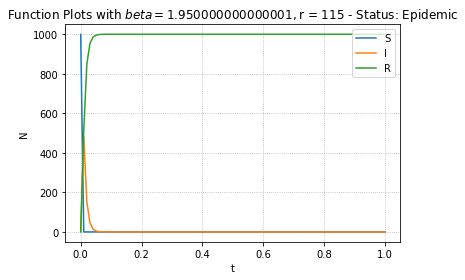

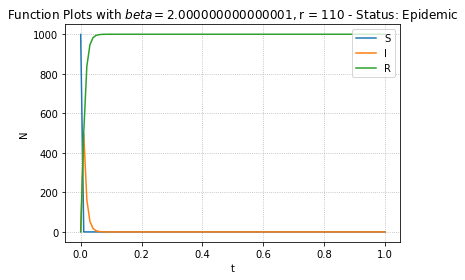

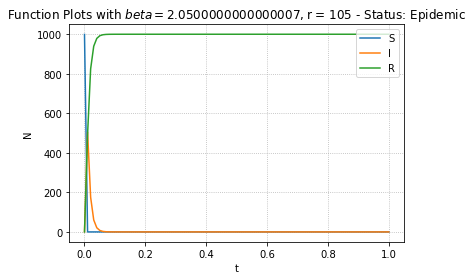

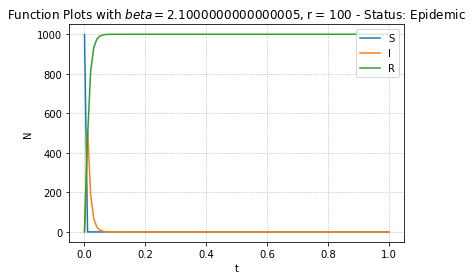

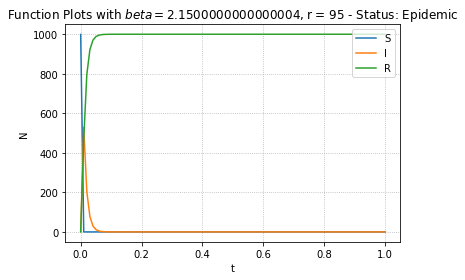

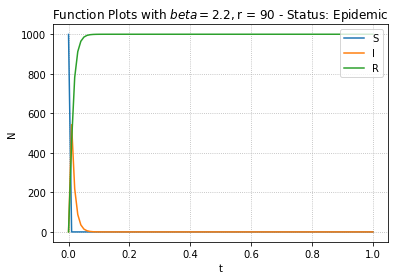

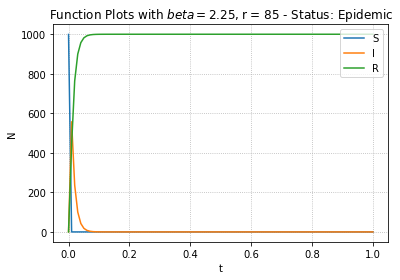

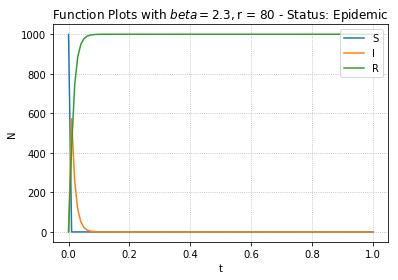

In [4]:
def SIR_Model(ic, t, bet, r):
    """The function returns the ODE of the SIR model having the following parameters
    ----------------------------------------------------------------------------------
    Parameters:
    -----------
    Ic= Initial condition of the models for each compartment
    t= the time 
    bet= the parameter for infectivity
    r= the removed
    It returns an ODE
    ------------------------------------------------------------------------------------
    """
    
    #The initial conditions
    s_t=ic[0]
    i_t=ic[1]
    r_t=ic[2]
    #The ODE for the model
    Dsdt = -(bet*s_t*i_t)
    Didt = (bet*s_t*i_t)-(r*i_t)
    Drdt = r*i_t
    return [Dsdt, Didt, Drdt]

def brr(bet, r, n):
    """This is a function that returns the Reproductive ratio
    ---------------------------------------------------------
    Parameters:
    bet= The values of infectivity
    r= the reproductive rate
    n= The number of population
    returns the Reproductive ratio
    """
    r0 = (bet*n)/r
    return r0
#defining the variables
n = 1000
t = linspace(0,1,100)
beta = 0.1
rr = 200
#initializing the number of the infected individual at t=0

infect = 0
#creating the disease spread
while infect < n:
    ic = [n,1,0]
    sir = odeint(SIR_Model, ic, t, args=(beta, rr))
    s,i,r = sir[:,0], sir[:,1], sir[:,2]
    #sir = odeint(SIR_Model, ic, t, args=(beta, rr))
    #s=sir[:,0]
    #i=sir[:,1]
    #r =sir[:,2]
    infect = sum(sir[:,1])
    R0 = brr(beta, rr, n)
    
    #plots and records if there is epidemic or not.
    if R0 > 1:
        plt.title("Function Plots with $beta = " + str(beta) + ", $r = " + str(rr) + " - Status: Epidemic")
    else:
        plt.title("Function Plots with $beta = " + str(beta) + ", $r = " + str(rr) + " - Status: No Epidemic")
    plt.plot(t, s, label='S')
    plt.plot(t, i, label='I')
    plt.plot(t, r, label='R')
    plt.legend(loc=1)
    plt.grid(True, linestyle='dotted')
    plt.xlabel('t')
    plt.ylabel('N')
    plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q2A/funcplots with beta = {} and rr = {}.png'.format(beta,rr),transparent=False)
    plt.show()
    beta+=0.05
    rr-=5

#Creating the gif pictures
path = '/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q2A/'

image_folder = os.fsencode(path)

filenames = []

for file in os.listdir(image_folder):
    filename = os.fsdecode(file)
    if filename.endswith( ('.jpeg', '.png', '.gif') ):
        filenames.append(os.path.join(path, filename))

filenames.sort() # this iteration technique has no built in order, so sort the frames

images = [imageio.imread(f) for f in filenames]
imageio.mimsave("/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q2A/GIF/Function_Plots.movie.gif", images,duration=1.2)



# Question 2B

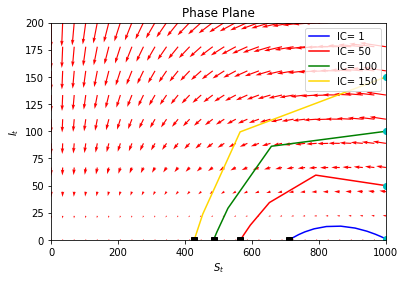

In [5]:
def SI_M(ic, t, beta, r):
    """The function returns the ODE of the SIR model having the following parameters
    ----------------------------------------------------------------------------------
    Parameters:
    -----------
    Ic= Initial condition of the models for each compartment
    t= the time 
    bet= the parameter for infectivity
    r= the removed
    It returns an ODE
    ------------------------------------------------------------------------------------
    """
    #initial conditions for the different compartment-Susceptible and Infected
    s_t, i_t = ic[0], ic[1]
    dsdt = -(beta*s_t*i_t)
    didt = (beta*s_t*i_t) - (r*i_t)
    return [dsdt, didt]

#defining the variables
beta, r = 0.2, 170
st = linspace(0.0, 1000, 30)
it = linspace(0.0, 200, 10)
St, It = meshgrid(st, it)
u, v = zeros(St.shape), zeros(It.shape)
n1, n2 = St.shape
for i in range(n1):
    for j in range(n2):
        x = St[i, j]
        y = It[i, j]
        res_t = SI_M([x, y], 0, beta, r)
        u[i,j] = res_t[0]
        v[i,j] = res_t[1]
     
plt.quiver(St, It, u, v, color='r')
plt.xlabel('$S_{t}$')
plt.ylabel('$I_{t}$')
plt.xlim([0, 1000])
plt.ylim([0, 200])

#initial conditions for phase plot for the model
for iic in [1, 50, 100, 150]:  
    ic = [1000, iic]
    t = linspace(0,20,1000)
    result = odeint(SI_M, ic, t, args=(beta, r))
    if iic== 1:
        color='blue'
    elif iic == 50:
        color = 'red'
    elif iic == 100:
        color = 'green'
    else:
        color = 'gold'
    #plotting the phase plots
    plt.plot(result[:,0], result[:,1], color=color,label='IC=' + ' ' + str(iic)) # path
    plt.plot([result[0,0]], [result[0,1]], 'o',color='c') # start
    plt.plot([result[-1,0]], [result[-1,1]], 's',color='k') # end
plt.xlim([0, 1000])
plt.legend(loc=1)
plt.title('Phase Plane')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q2B/funcplots with beta = {} and rr = {}.png'.format(beta,rr),transparent=False)
    


# Question 2C

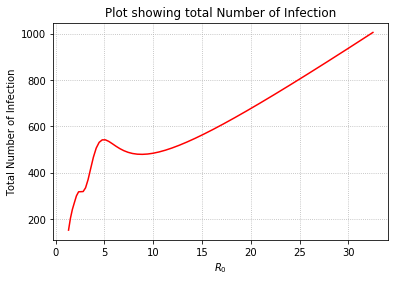

In [10]:
def plague(ic, t, beta, r):
    """plague is a function that returns ODE 
    ---------------------------------------------------------------------------
    Parameter
    Ic= The initial condition for the model
    t= time of the disease spreading
    beta= rate of infectivity
    r= value for the recovered
    -----------------------------------------------------------------------------
    returns the ODE
    """
    #initial conditions for each compartment
    s_t, i_t, r_t = ic[0], ic[1], ic[2]
    #the equations for the model
    dsdt = -(beta*s_t*i_t)
    didt = (beta*s_t*i_t) - (r*i_t)
    drdt = r*i_t
    return [dsdt, didt, drdt]
#creating function  for the Reproductive rate 
def brr(beta, r, n):
    r0 = (beta*n)/r
    return r0

n = 1000
t = linspace(0,1,100)
inf=[]
rnot=[]
beta = 0.4
rr = 300
infect = 0
while infect < n:
    ic = [n,1,0]
    sir = odeint(plague, ic, t, args=(beta, rr))
    it = sir[:,1]
    rrn = brr(beta, rr, n)
    infect = sum(it)
    rnot.append(rrn)
    inf.append(infect)
    beta+=0.05
    rr-=5
#plotting graph
plt.title("Plot showing total Number of Infection")
plt.plot(rnot, inf,'r')
plt.grid(True, linestyle='dotted')
plt.xlabel('$R_{0}$')
plt.ylabel('Total Number of Infection')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q2C/function plots of infection .png',transparent=False)
plt.show()

# Question 3

In [ ]:

def Barmodel(G, p, infection_start_node):
    
    """The Barmodel, returns a graph showing the contact from a susceptible node with an infected node given that they 
       are connected by edges. It starts from an initial node, and it affects other nodes joined together by edges at a
       given probability.
       -------------------------------------------------------------------------------------------------------------------
       Parameter
       G= A given random graph
       p= The probabilty of a node infecting other nodes that are joined together by edges
       infection_start_node: This is where the infection starts from
       
    """
    #Draws rge betwork layout
    pos=nx.spring_layout(G)
    infectnode = [infection_start_node]#initializes the initial nodes
    #creates a list for recovery nodes
    recovernode = [] 
    permanent = []
    susceptnode = G.nodes()
    
    i=0
    #Creates a loop for the infection and susceptible contacts
    while len(infectnode) > 0:
        susceptnodel = len(G.nodes()) - len(infectnode) - len(recovernode)
        print(susceptnodel, len(infectnode), len(recovernode))
        plt.title("SIR Model on a Barabasi Graph: Time =" + str(i+1))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=recovernode, node_color="green")
        plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_BGraph/SIR Graph={}.png'.format(i+1),transparent=False)
        susceptible_list = []
        infection_list = []
        for infected_node in infectnode:
            for node in G.neighbors(infected_node):
                gp = random.uniform(0,1)
                if gp >= p:
                    if node not in infection_list:
                        infection_list.append(node)
        for node in infectnode:
            if node not in recovernode:
                recovernode.append(node)
        infectnode = []
        for node in infection_list:
            if node not in recovernode:
                infectnode.append(node)
        for node in G.nodes():
            if node not in recovernode or node not in infectnode:
                susceptible_list.append(node)
        susceptnode = susceptible_list
        if len(infectnode) == 0:
            susceptnode = len(G.nodes()) - len(infectnode) - len(recovernode)
            print(susceptnode, len(infectnode), len(recovernode)) #spitting out the susceptible, recovery node
            plt.title("SIR Model on a Barabasi Graph:($n = " + str(i+1) + "$ steps) ")
            #drawing the networks
            nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="grey")
            nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
            nx.draw_networkx_nodes(G, pos=pos, nodelist=recovernode, node_color="green")
            plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_BGraph/Brabasi SIR Graph={}.png'.format(i+1),transparent=False)
        i+=1
        #Creating the gif pictures
    path = '/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_BGraph/'

    image_folder = os.fsencode(path)

    filenames = []

    for file in os.listdir(image_folder):
        filename = os.fsdecode(file)
        if filename.endswith( ('.jpeg', '.png', '.gif') ):
            filenames.append(os.path.join(path, filename))

    filenames.sort() # this iteration technique has no built in order, so sort the frames

    images = [imageio.imread(f) for f in filenames]
    imageio.mimsave("/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_BGraph/GIF/Barabasi.movie.gif", images,duration=1.2)

    return

In [ ]:
#The barabasi albert SIR model grapj
G= nx.barabasi_albert_graph(100,15) 

Barmodel(G, 0.5, 0)

In [ ]:
def Watmodel(G, p, infection_start_node):
    
   """The Watmodel, returns a graph showing the contact from a susceptible node with an infected node given that they 
       are connected by edges. It starts from an initial node, and it affects other nodes joined together by edges at a
       given probability.
       -------------------------------------------------------------------------------------------------------------------
       Parameter
       G= A given random graph
       p= The probabilty of a node infecting other nodes that are joined together by edges
       infection_start_node: This is where the infection starts from
       returns the Watt Graph
    """
   #Draws rge betwork layout
    pos=nx.spring_layout(G)
    infectnode = [infection_start_node]#initializes the initial nodes
    #creates a list for recovery nodes
    recovernode = []
    permanent = []
    susceptnode = G.nodes()
    i=0
    #Creates a loop for the infection and susceptible contacts
    while len(infectnode) > 0:
        susceptnodel = len(G.nodes()) - len(infectnode) - len(recovernode)
        print(susceptnodel, len(infectnode), len(recovernode)) #spitting out susepctible and recovery rate
        plt.title("SIR Model on a Watts_Graph: Time =" + str(i+1))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="yellow") #drawing the network while the infection is in the population
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=recovernode, node_color="green")
        plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_WatGraph/SIR Graph={}.png'.format(i+1),transparent=False)
        susceptible_list = []
        infection_list = []
        for infected_node in infectnode:
            for node in G.neighbors(infected_node):
                gp = random.uniform(0,1)
                if gp >= p:
                    if node not in infection_list:
                        infection_list.append(node)
        for node in infectnode:
            if node not in recovernode:
                recovernode.append(node)
        infectnode = []
        for node in infection_list:
            if node not in recovernode:
                infectnode.append(node)
        for node in G.nodes():
            if node not in recovernode or node not in infectnode:
                susceptible_list.append(node)
        susceptnode = susceptible_list
        if len(infectnode) == 0:
            susceptnode = len(G.nodes()) - len(infectnode) - len(recovernode)
            print(susceptnode, len(infectnode), len(recovernode))
            plt.title("SIR Model on a Watts_Graph:($n = " + str(i+1) + "$ steps) ")
            nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="grey")
            nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
            nx.draw_networkx_nodes(G, pos=pos, nodelist=recovernode, node_color="green")
            plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_WatGraph/SIR Graph={}.png'.format(i+1),transparent=False)
        i+=1
        #Creating the gif pictures
    path = '/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_WatGraph/'

    image_folder = os.fsencode(path)

    filenames = []

    for file in os.listdir(image_folder):
        filename = os.fsdecode(file)
        if filename.endswith( ('.jpeg', '.png', '.gif') ):
            filenames.append(os.path.join(path, filename))

    filenames.sort() # this iteration technique has no built in order, so sort the frames

    images = [imageio.imread(f) for f in filenames]
    imageio.mimsave("/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3A_WatGraph/GIF/WattsGraph.movie.gif", images,duration=1.2)

    return
G = nx.barabasi_albert_graph(100,5) 
p = 0.5
n = 100
infection_start_node = 0
Watmodel(G, p, infection_start_node)

# Question 3b

In [13]:

def sirtmodel(G, p, t, infection_start_node):
    """This function returns the  susceptible, infective and recovery nodes.
    ---------------------------------------------------------------------------------------------
    Parameters
    G= Random graph
    p=probability
    t= time
    infection_start_node= The node where the infection starts from
    
    """
    #Drawing the network
    pos=nx.spring_layout(G)
    infectnode = [infection_start_node]
    recovernode = []
    permanent = []
    susceptnode = G.nodes()
    infectoutput = []
    recoveroutput = []
    susceptoutput = []
    for i in range(t):
        # Number of Susceptible, Infected and Recovered Individuals
        susceptnodel = len(G.nodes()) - len(infectnode) - len(recovernode)
        infectoutput.append(len(infectnode))
        recoveroutput.append(len(recovernode))
        susceptoutput.append(susceptnodel)
        # creating an empty list for Susceptible and Infection
        susceptible_list = []
        infection_list = []
        for infected_node in infectnode:
            for node in G.neighbors(infected_node):
                gp = random.uniform(0,1)
                if gp >= p:
                    if node not in infection_list:
                        infection_list.append(node)
        for node in infectnode:
            if node not in recovernode:
                recovernode.append(node)
        # New infection minus recovered individuals
        infectnode = []
        for node in infection_list:
            if node not in recovernode:
                infectnode.append(node)
        #Susceptible individuals
        for node in G.nodes():
            if node not in recovernode or node not in infectnode:
                susceptible_list.append(node)
        susceptnode = susceptible_list
    infectoutpute, recoveroutpute, susceptoutpute = numpy.array(infectoutput),numpy.array(recoveroutput),numpy.array(susceptoutput)
    return (susceptoutpute,infectoutpute,recoveroutpute)

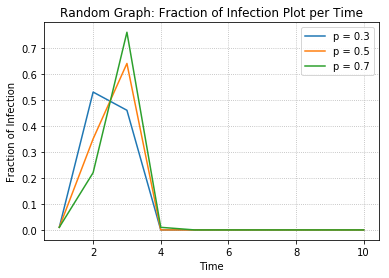

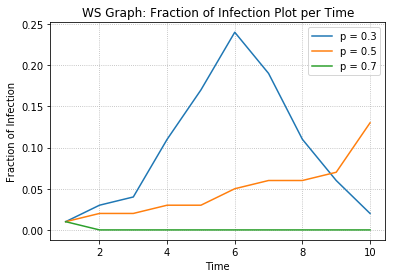

In [14]:
n= 100
t=10
#Creating the three types of graph
G1 = nx.erdos_renyi_graph(n,0.7)
G2 = nx.watts_strogatz_graph(n, 5, 0.7) 
G3 = nx.barabasi_albert_graph(n,5) 
infection_start_node = 0
probs = [0.3,0.5,0.7] #different Probabilities defined
trange = [i+1 for i in range(10)]
#Random Graoh
for p in probs:
    infgrap = sirtmodel(G1, p, t, infection_start_node)
    plt.title("Random Graph: Fraction of Infection Plot per Time")
    plt.plot(trange, ((infgrap[1])/n), label = "p = "+str(p))
    plt.grid(True, linestyle='dotted')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3AB/ RandomFracton Infection plot against Time.png',transparent=False)

plt.xlabel('Time')
plt.ylabel('Fraction of Infection')
plt.legend(loc=1)
plt.show()

#Watts Graph
for p in probs:
    infgrap = sirtmodel(G2, p, t, infection_start_node)
    plt.title("WS Graph: Fraction of Infection Plot per Time")
    plt.plot(trange, ((infgrap[1])/n), label = "p = "+str(p))
    plt.grid(True, linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Fraction of Infection')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3AB/watts Fracton Infection plot against Time.png',transparent=False)
plt.legend(loc=1)
plt.show()
for p in probs:
    infgrap = sirtmodel(G3, p, t, infection_start_node)
    plt.title("BA Graph: Fraction of Infection Plot per Time")
    plt.plot(trange, ((infgrap[1])/n), label = "p = "+str(p))
    plt.grid(True, linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Fraction of Infection')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3AB/Bar Fracton Infection plot against Time.png',transparent=False)
plt.legend(loc=1)
plt.show()

# Question 3C

In [ ]:
n, t = 100, 10
G1 = nx.erdos_renyi_graph(n,0.7)
G2 = nx.watts_strogatz_graph(n, 5, 0.7) 
G3 = nx.barabasi_albert_graph(n,5) 
GU = [G1, G2, G3]
GUname = ["Random Graph","WS Graph","BA Graph"]
infection_start_node = 0
probs = [i*0.05 for i in range(1,21)]
for G in GU:
    total_prop_infect = []
    for p in probs:
        infgrap = sirtmodel(G, p, t, infection_start_node)
        count = 0
        sume = 0
        for i in infgrap[1]:
            if i != 0:
                count+=1
                sume = sume + i
        tot_prop_infect = sume/(n)
        total_prop_infect.append(tot_prop_infect)
    plt.title("Total Proportion of Infection Against Probability")
    plt.plot(probs, total_prop_infect, label = GUname[GU.index(G)])
    plt.grid(True, linestyle='dotted')
plt.xlabel('Probability of Infection')
plt.ylabel('Total Proportion of Infection ')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3AC/Bar Fracton Infection plot against Time.png',transparent=False)

Total Proportion of Infection Against Probability.png',transparent=False)
plt.legend(loc='best')
plt.show()





In [ ]:
n, t = 100, 10
G1 = nx.erdos_renyi_graph(n,0.7)
G2 = nx.watts_strogatz_graph(n, 5, 0.7) 
G3 = nx.barabasi_albert_graph(n,5) 
GU = [G1, G2, G3]
GUname = ["Random Graph","WS Graph","BA Graph"]
infection_start_node = 0
probs = [i*0.05 for i in range(1,21)]
for G in GU:
    time_to_clear_infect = []
    for p in probs:
        infgrap = sirtmodel(G, p, t, infection_start_node)
        count = 0
        for i in infgrap[1]:
            if i != 0:
                count+=1
        time_to_clear_infect.append(count)
    plt.title("Time to Clear Infection Against Probability")
    plt.plot(probs, time_to_clear_infect, label = GUname[GU.index(G)])
    plt.grid(True, linestyle='dotted')
plt.xlabel('Probability of Infection')
plt.ylabel('Time to Clear Infection')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3AC/Bar Fracton Infection plot against Time.png',transparent=False)
plt.legend(loc='best')
plt.show()

In [ ]:
n, t = 100, 10
G1 = nx.erdos_renyi_graph(n,0.7)
G2 = nx.watts_strogatz_graph(n, 5, 0.7) 
G3 = nx.barabasi_albert_graph(n,5) 
Gs = [G1, G2, G3]
GsN = ["Random Graph","WS Graph","BA Graph"]
infection_start_node = 0
probs = [i*0.05 for i in range(1,21)]
for G in Gs:
    time_to_largest_infect = []
    for p in probs:
        infgrap = sirtmodel(G, p, t, infection_start_node)
        count = 0
        max_val = max(infgrap[1])
        for i in infgrap[1]:
            if i == max_val:
                time_max = count
            if i != 0:
                count+=1
        time_to_largest_infect.append(time_max)
    plt.title("Time to Largest Infection Against Probability")
    plt.plot(probs, time_to_largest_infect, label = GsN[Gs.index(G)])
    plt.grid(True, linestyle='dotted')
plt.xlabel('Probability of Infection')
plt.ylabel('Time to Largest Infection')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/My Assignments/diffusion-networks/List5/Q3AC/Bar Fracton Infection plot against Time.png',transparent=False)

plt.legend(loc='best')
plt.show(